# Assignment 1 – ML Data Cleaning and Feature Selection

## Introduction
In this assignment, you will engage with a dataset for predictive learning to assess the quality of the data and determine the most important features.

### Questions to Answer:

1. What are the data types present (Only numeric and categorical)?
2. Are there missing values in the dataset?
3. What are the likely distributions of the numeric variables?
4. Which independent variables are useful to predict a target (dependent variable)? Use at least three methods.
5. Which independent variables have missing data? How much?
6. Do the training and test sets have the same data?
7. Are the predictor variables independent of all the other predictor variables?
8. Which predictor variables are the most important?
9. Do the ranges of the predictor variables make sense?
10. What are the distributions of the predictor variables?
11. Analyze the effect of removing outliers on the final predictive model.
12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. Assess the effectiveness of these methods.
13. For categorical data, calculate the accuracy and create a confusion matrix.

### Resources:
- [Imputation Methods for Missing Data](https://www.youtube.com/watch?v=fYhr8eF1ubo)
- [Nice EDA notebook](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

### Scoring Rubric

- **Are my answers supported with data? (20 Points)**  
  Tables, graphs, and charts must support your evaluation/answers.

- **Google Colab Requirement (5 Points)**  
  It MUST run in Google Colab. Save the Google Colab notebook as a .ipynb file and upload that to Canvas.

- **Public Dataset (5 Points)**  
  Pick a public dataset for Regression or Classification. You MUST get approval for your dataset from the TAs.

- **Code Originality (5 Points)**  
  Explain what code is yours and what you have adapted. Cite ANY code to avoid a zero for this section.

- **Code Explanation (15 Points)**  
  Did I explain my code clearly? Your code review score will be scaled to 0-10.

- **Licensing (5 Points)**  
  Did I explain my licensing clearly? Failure to do so will result in a zero for this section.

- **Answers to Questions (45 Points)**  
  Refer to the list of questions above.

### Notes on Statistical Concepts:

- **Normality**: We're checking for univariate normality for our target variable. This helps to avoid problems like heteroscedasticity.

- **Homoscedasticity**: We desire homoscedasticity because we want equal levels of variance across our predictor variables.

- **Linearity**: We assess linearity by examining scatter plots and looking for linear patterns.

- **Absence of Correlated Errors**: Correlated errors occur when one error is systematically related to another, often found in time series data.

Remember to search for linear patterns and consider data transformations if necessary to handle non-linearity and correlated errors.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('AB_US_2023.csv', low_memory=False)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


#What are the data types? (Only numeric and categorical)

In [4]:
data_types = df.dtypes

In [5]:
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
city                               object
dtype: object


In [6]:
df.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

# Are there missing values?

Since `neighbourhood_group`, `name`, `last_review`, and `host_name` were categorical values, I removed all null values from these columns. Then the last four columns had one missing value each, and removing them will not cause any loss in data, hence I removed that row.


In [27]:
clean_df = df.dropna(subset=['neighbourhood_group', 'name', 'last_review', 'host_name', 'reviews_per_month'])

In [8]:
clean_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

# What are the likely distributions of the numeric variables?

Utilizing Q-Q plots, we can examine the likely distributions of numeric variables within the dataset.


<Figure size 800x500 with 0 Axes>

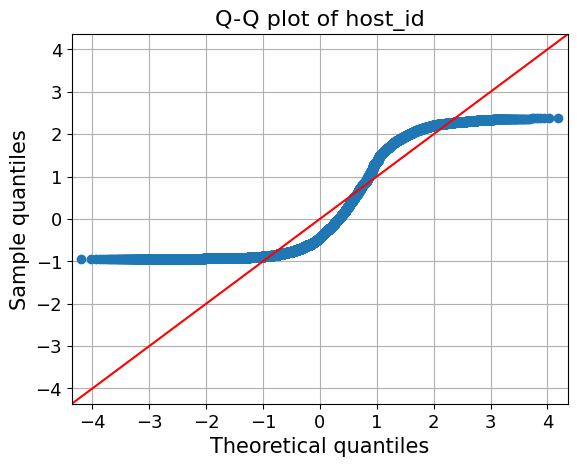

<Figure size 800x500 with 0 Axes>

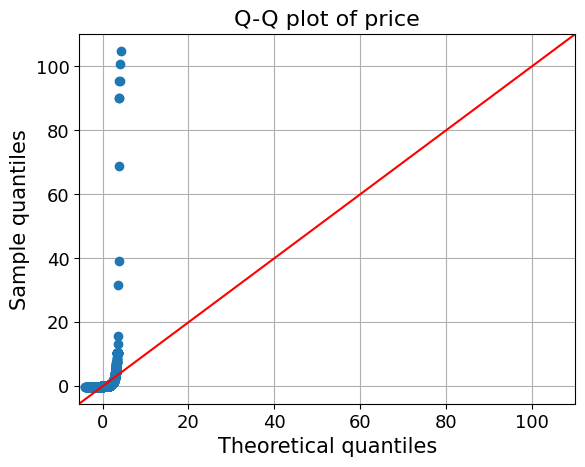

<Figure size 800x500 with 0 Axes>

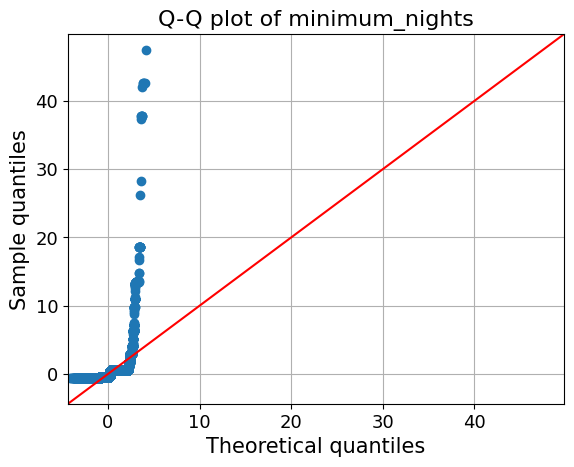

<Figure size 800x500 with 0 Axes>

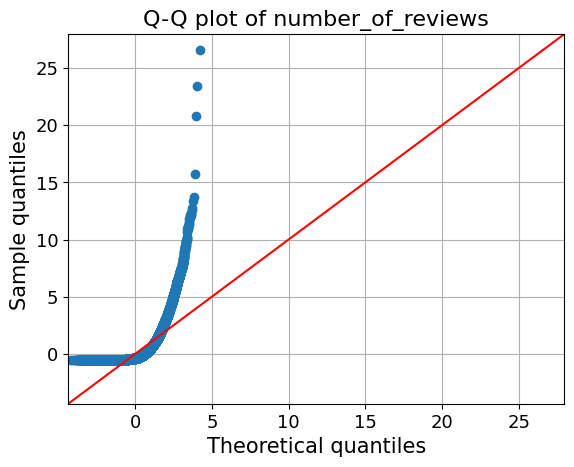

<Figure size 800x500 with 0 Axes>

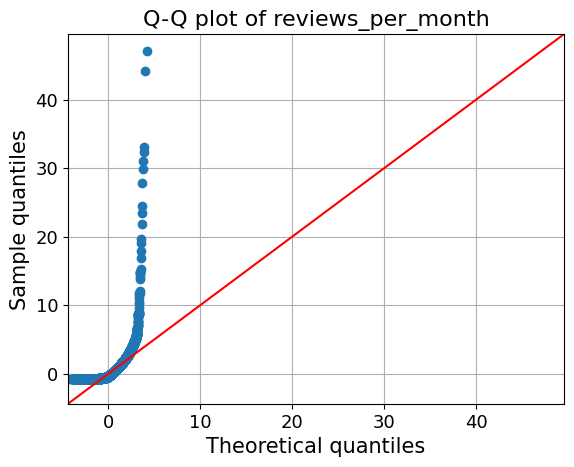

<Figure size 800x500 with 0 Axes>

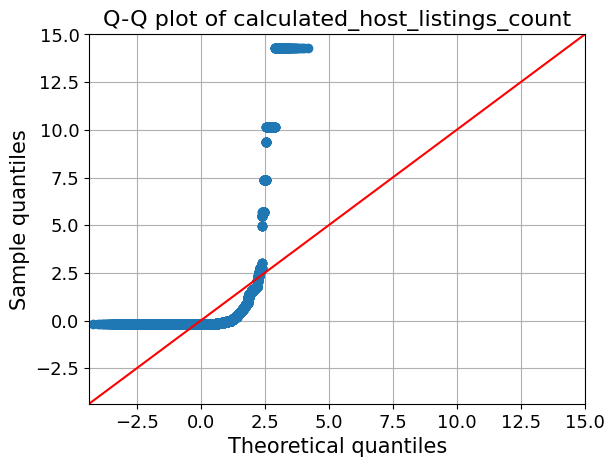

<Figure size 800x500 with 0 Axes>

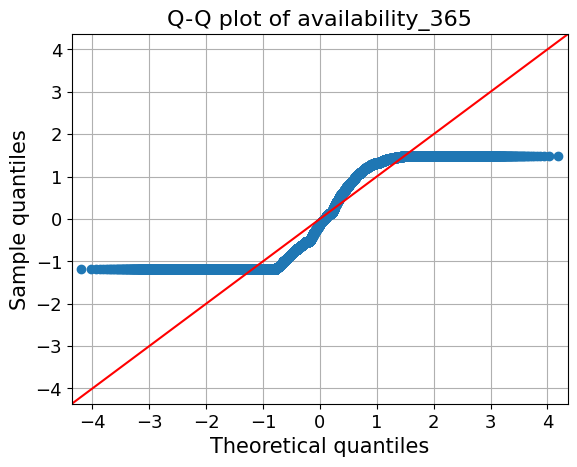

<Figure size 800x500 with 0 Axes>

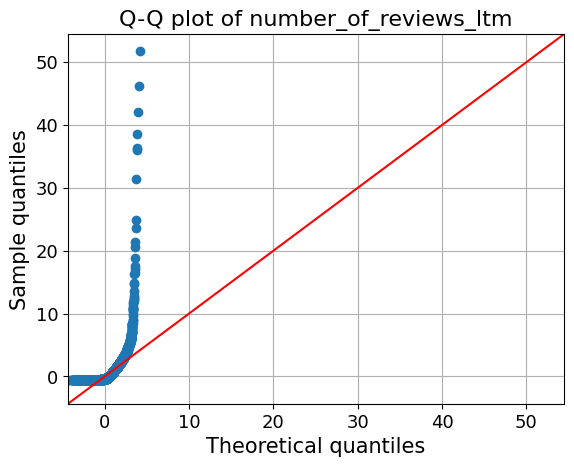

In [9]:
data_norm = clean_df[["host_id", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"]]

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

- **host_id**: Shows notable deviation from a normal distribution, mainly at the tails.
- **price**: Exhibits significant skewness with numerous extreme outliers.
- **minimum_nights**: Displays a pronounced skewness and many outliers, akin to price.
- **number_of_reviews**: Indicates rightward skewness with a tail of outliers.
- **reviews_per_month**: Heavily right-skewed distribution with outliers.
- **calculated_host_listings_count**: Suggests a rightward skew in its distribution.
- **availability_365**: Reveals skewness, especially noticeable in the upper tail.
- **number_of_reviews_ltm**: Right-skewed with the presence of outliers.

All variables show clear deviations from the theoretical line in the Q-Q plots, signaling that they do not align well with a normal distribution. This is especially true for the tails. Prior to use in parametric methods, which assume normality, transformations or normalizations could be necessary for these data sets.


# Which independent variables are useful to predict a target (dependent variable)?

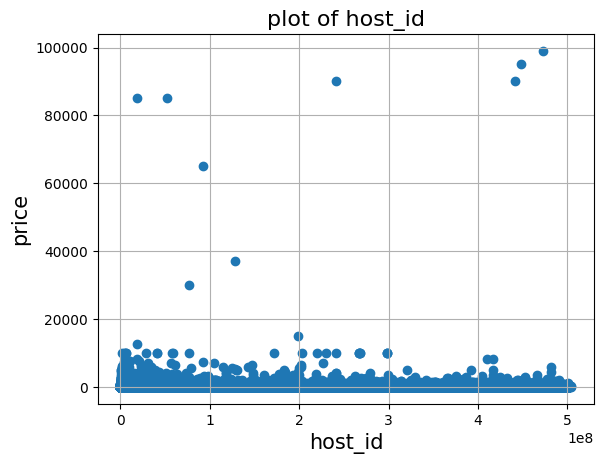

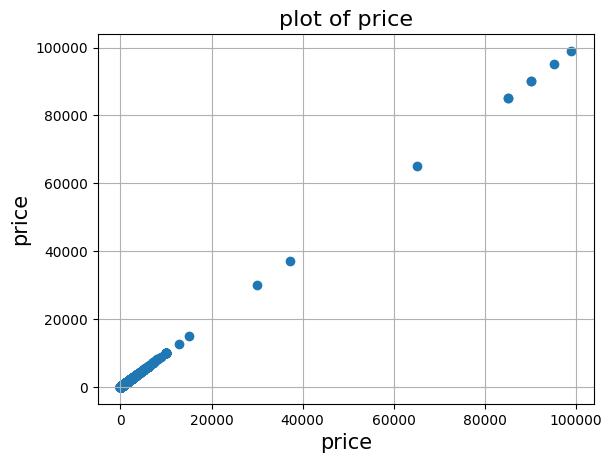

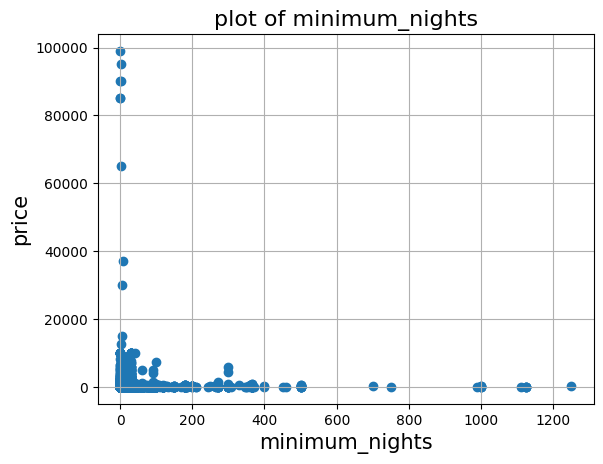

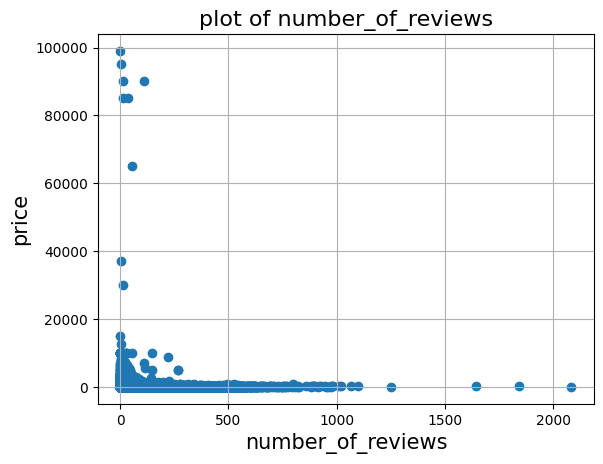

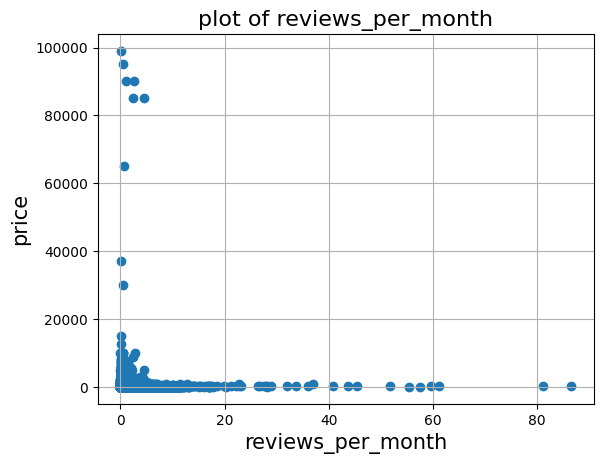

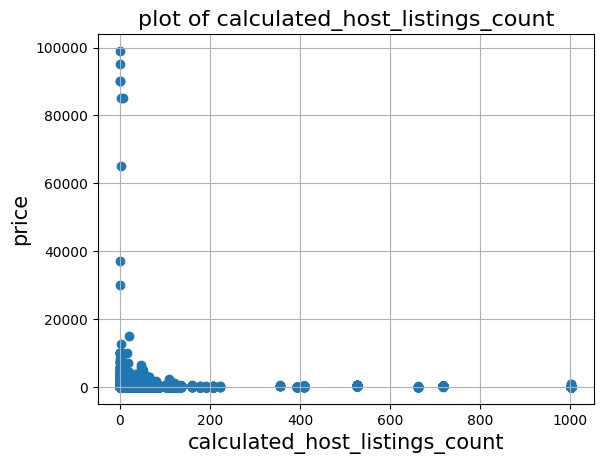

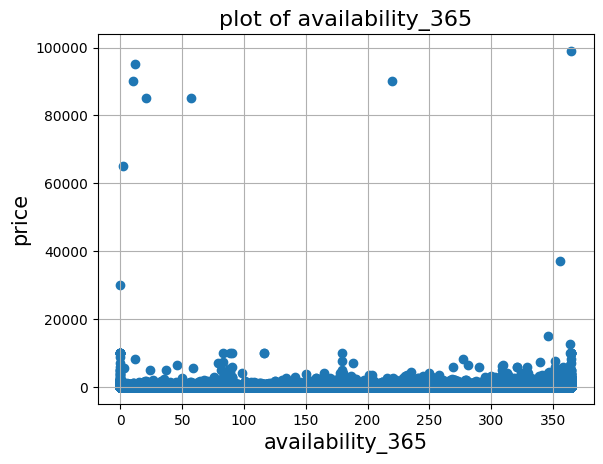

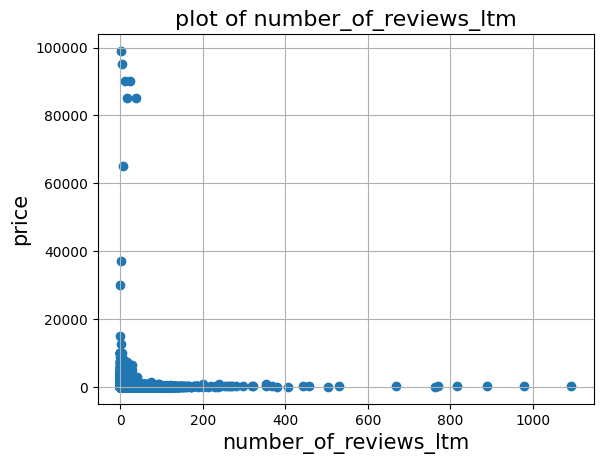

In [10]:
for c in data_norm.columns[:]:
    plt.scatter(clean_df[[c]], clean_df[["price"]])
    plt.xlabel(c, fontsize=15)
    plt.ylabel("price", fontsize=15)
    plt.title("plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

- `host_id`: No discernible impact on `price`.
- `price`: Plot possibly incorrect; may intend to show price distribution.
- `minimum_nights`: Outliers present, but most data concentrated at lower `minimum_nights`.
- `number_of_reviews`: Increased reviews don't equate to increased `price`.
- `reviews_per_month`: Higher monthly reviews do not trend with higher `price`.
- `calculated_host_listings_count`: More host listings don't lead to higher `price`.
- `availability_365`: Availability doesn't have a straightforward relationship with `price`.
- `number_of_reviews_ltm`: More recent reviews are not associated with increased `price`.


<ipython-input-11-ee81c82f340a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(clean_df.corr(), annot=True, cmap = 'RdYlGn')


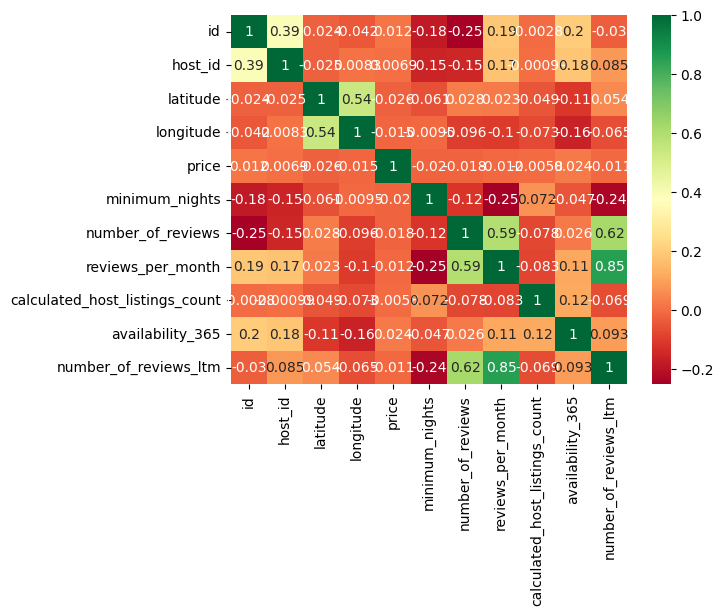

In [11]:
ax = sns.heatmap(clean_df.corr(), annot=True, cmap = 'RdYlGn')

In the heatmap, a correlation coefficient of 0 would indicate complete independence between variables. Yet, such a correlation isn't observed here. While many variables have low correlations, implying weak relationships, none are perfectly uncorrelated. For instance, `id` and `host_id` display a moderate negative correlation with a coefficient of -0.39.

Variables with higher correlations, such as `reviews_per_month` and `number_of_reviews`, which have a coefficient of 0.59, show a moderate positive correlation, suggesting they are related.


# Which predictor variables are the most important?

In [14]:
model = sm.OLS(
    data_norm["price"],
    data_norm[
        [
           "host_id",
           "minimum_nights",
           "number_of_reviews",
           "reviews_per_month",
           "calculated_host_listings_count",
           "availability_365",
           "number_of_reviews_ltm"
        ]
    ],
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              408.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        01:08:46   Log-Likelihood:                     -6.0056e+05
No. Observations:               72598   AIC:                                  1.201e+06
Df Residuals:                   72591   BIC:                                  1.201e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                         2.982e-07   2.31e-08     12.909      0.000    2.53e-07    3.43e-07
minimum_nights                     0.9629      0.127      7.556      0.000       0.713       1.213
number_of_reviews                  0.2103      0.061      3.462      0.001       0.091       0.329
reviews_per_month                  8.2465      3.817      2.160      0.031       0.765      15.728
calculated_host_listings_count    -0.0484      0.052     -0.940      0.347      -0.149       0.053
availability_365                   0.5542      0.023     23.682      0.000       0.508       0.600
number_of_reviews_ltm             -0.4360      0.332     -1.312      0.190      -1.087       0.215
==============================================================================
Omnibus:                   267585.663   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     167106189295.024
Skew:                          79.661   Prob(JB):                         0.00
Kurtosis:                    7433.872   Cond. No.                     2.27e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

host_id: Positive significant relationship with price. Each unit increase in host_id increases the price by a very small amount.

minimum_nights: Shows a positive and significant effect on price, suggesting that listings with longer minimum stays are associated with higher prices.

number_of_reviews: Positively related to price and statistically significant, implying that listings with more reviews tend to have higher prices.

reviews_per_month: Also positively related to price, but less significant than number_of_reviews, suggesting a weaker positive effect on price.

calculated_host_listings_count: Not significantly related to price, indicating that the number of listings a host has does not significantly affect the listing price.

availability_365: Strong positive relationship with price, meaning that listings with more available days are priced higher.

number_of_reviews_ltm (last twelve months): Negative coefficient but not significant, indicating that recent reviews have a negative but not statistically significant impact on price.


<Axes: >

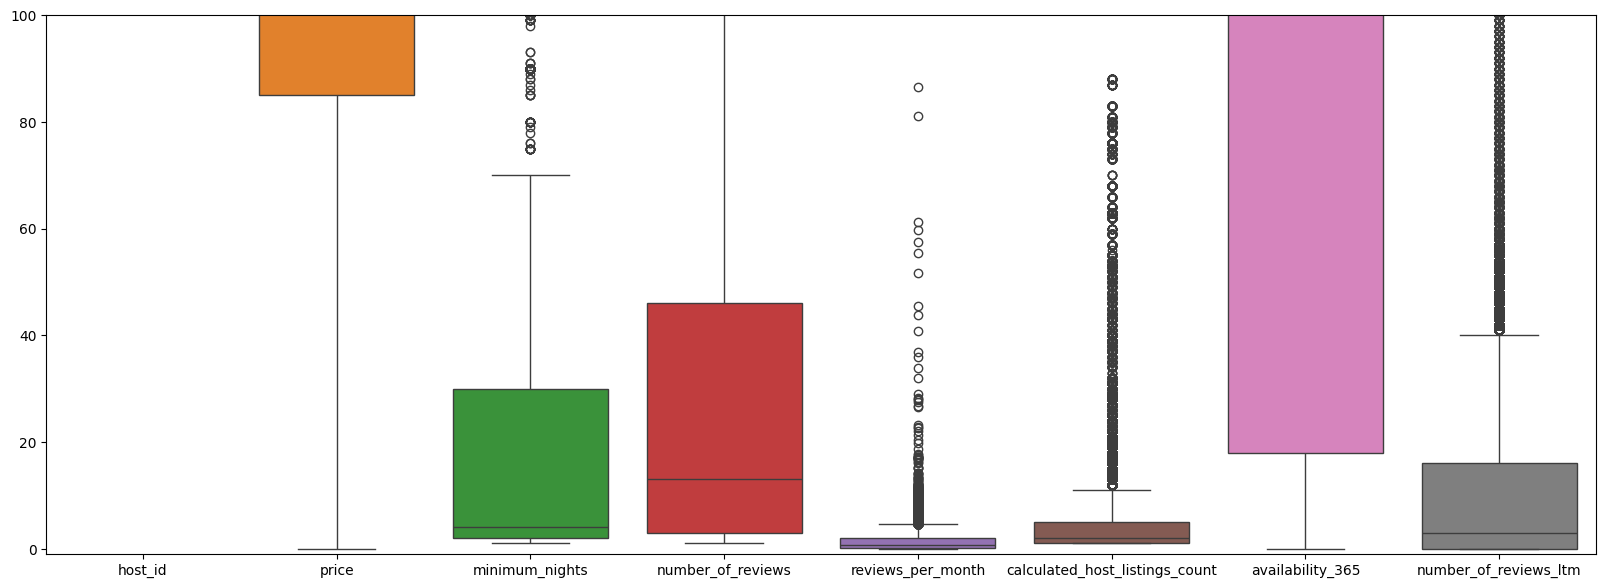

In [67]:
plt.figure(figsize=(20, 7))
plt.ylim(-1, 100)
sns.boxplot(data=data_norm)

#Do the ranges of the predictor variables make sense?
Each variable's values fall between 0 to 100, except for `host_id`. The `host_id` values are unique and unrelated, so I will exclude it from normalization.


In [16]:
clean_df.nunique()

id                                72598
name                              70993
host_id                           44559
host_name                         13938
neighbourhood_group                  30
neighbourhood                       604
latitude                          47584
longitude                         47763
room_type                             4
price                              1415
minimum_nights                      120
number_of_reviews                   672
last_review                        3013
reviews_per_month                  1070
calculated_host_listings_count      101
availability_365                    366
number_of_reviews_ltm               196
city                                  4
dtype: int64

Some categorical features, such as `city` and `room_type`, will be subjected to one-hot encoding. Previously, these were omitted from the analysis due to their categorical nature. However, they may contain useful insights—for instance, the price of a property might differ depending on the city and the size of the property. One-hot encoding these variables should not significantly increase dimensionality, allowing us to gain valuable insights without compromising performance.


In [28]:
encode_columns = ["city", "room_type"]
encoded_df = pd.get_dummies(clean_df, columns = encode_columns)
encoded_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city_Los Angeles,city_New York City,city_Rhode Island,city_Seattle,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
24260,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,61,5,1,2022-12-26,0.42,5,27,1,1,0,0,0,0,0,1,0
24262,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,46,3,5,2023-01-16,0.86,4,87,5,1,0,0,0,0,0,1,0
24263,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,408,3,53,2022-11-26,0.64,10,270,13,1,0,0,0,0,0,1,0
24264,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,80,2,44,2023-02-24,1.09,4,357,26,1,0,0,0,0,0,1,0
24265,13077628,Zuma Malibu Retreat,4182067,Jeremy,Other Cities,Malibu,34.039790,-118.868850,2138,7,15,2018-07-30,0.18,1,358,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189443,743530503636805823,The Zen Room in the Central District,484453762,Julia,Central Area,Mann,47.602010,-122.299120,36,1,31,2023-03-07,6.55,20,89,31,0,0,0,1,0,0,1,0
189445,743578810848940797,1 bedroom in Ballard w/ outdoor patio,52448159,Kiera,Ballard,Loyal Heights,47.689810,-122.379060,79,1,18,2023-03-10,5.05,1,50,18,0,0,0,1,1,0,0,0
189446,743583595153614537,Hideout Room in the Central District,484453762,Julia,Central Area,Mann,47.601920,-122.300590,36,1,11,2023-03-02,2.26,20,89,11,0,0,0,1,0,0,1,0
189447,743600450516590869,New Private Apt-1 Bdrm w/Queen Bed in Capitol ...,1766221,Karina,Capitol Hill,Stevens,47.623950,-122.301550,119,1,11,2023-02-25,2.64,1,236,11,0,0,0,1,1,0,0,0


#Building the model

Training and Test data

In [52]:
X = encoded_df.drop(columns=['name','host_name','neighbourhood_group','neighbourhood','latitude','longitude','price', 'last_review'])

y = encoded_df[["price"]]


X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Splitting the data into Training 80% and Test 20%

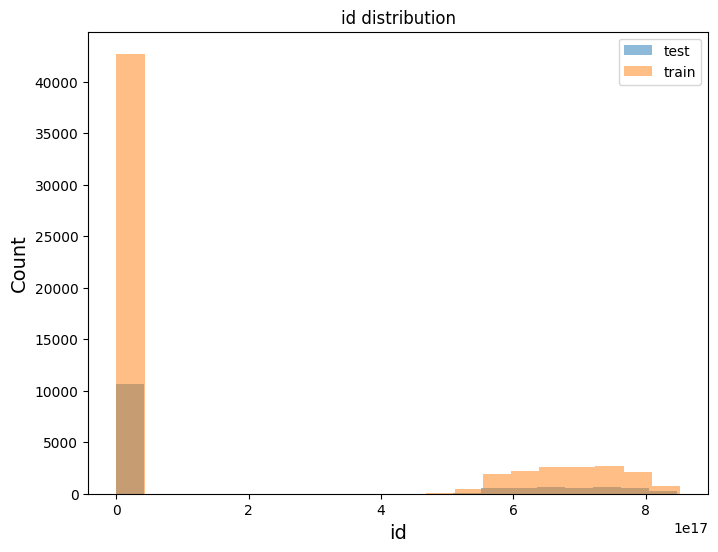

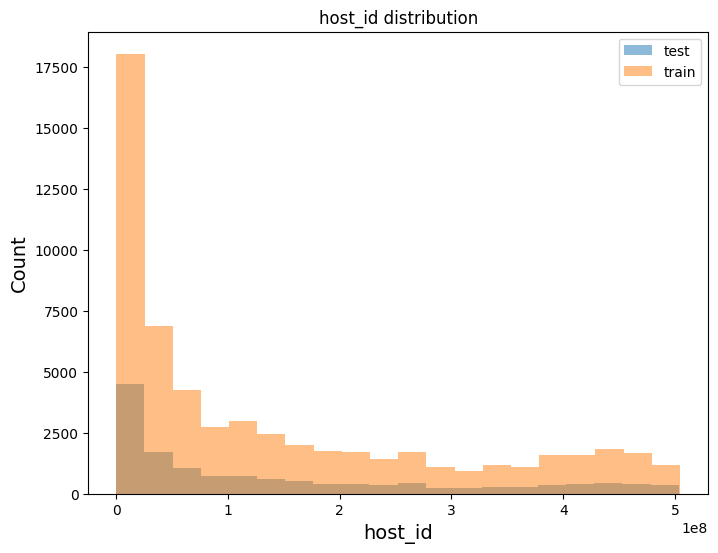

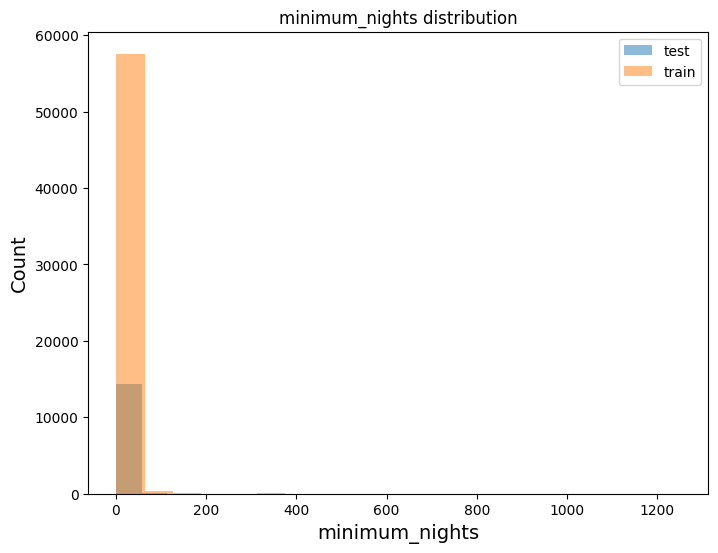

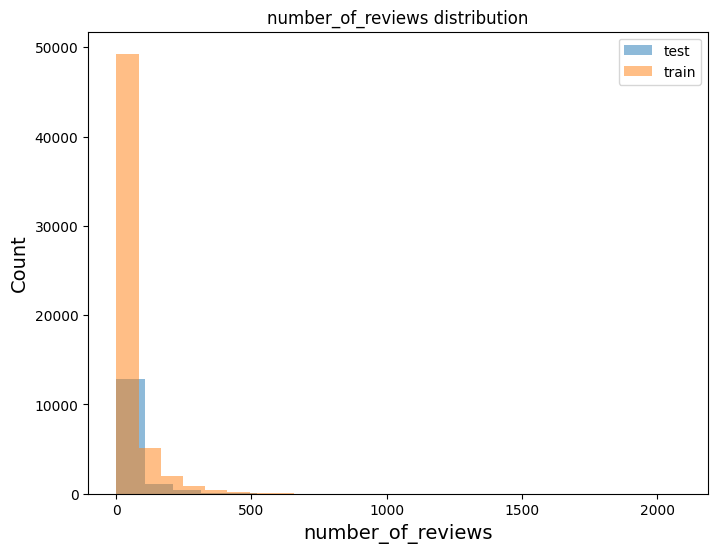

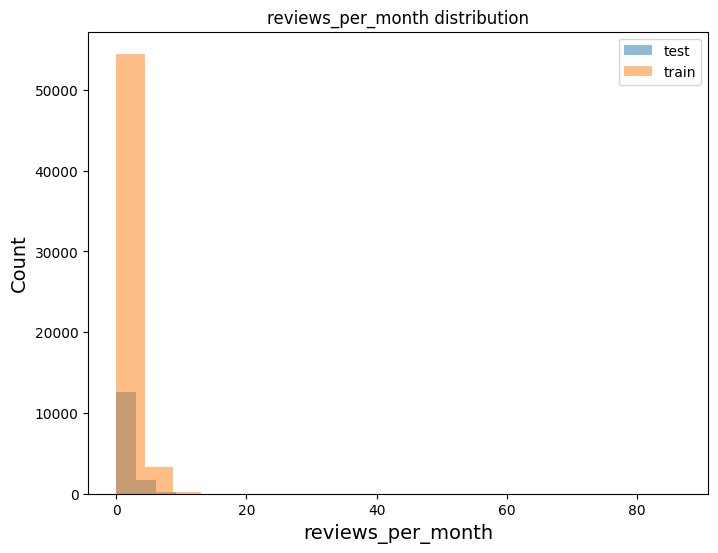

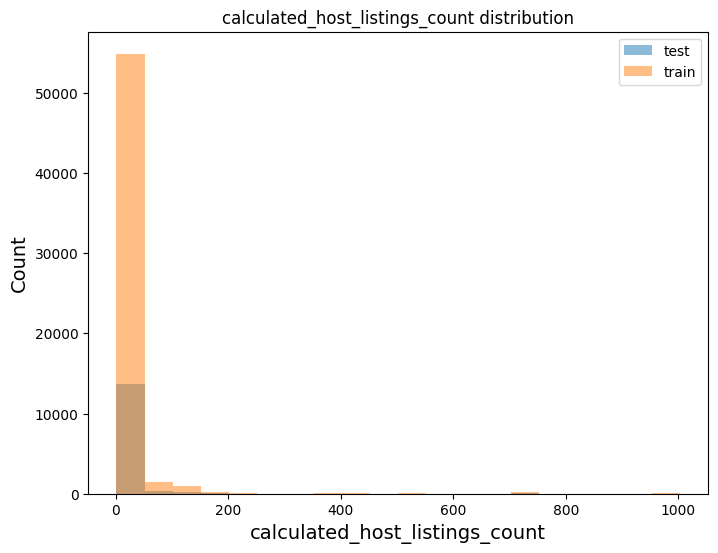

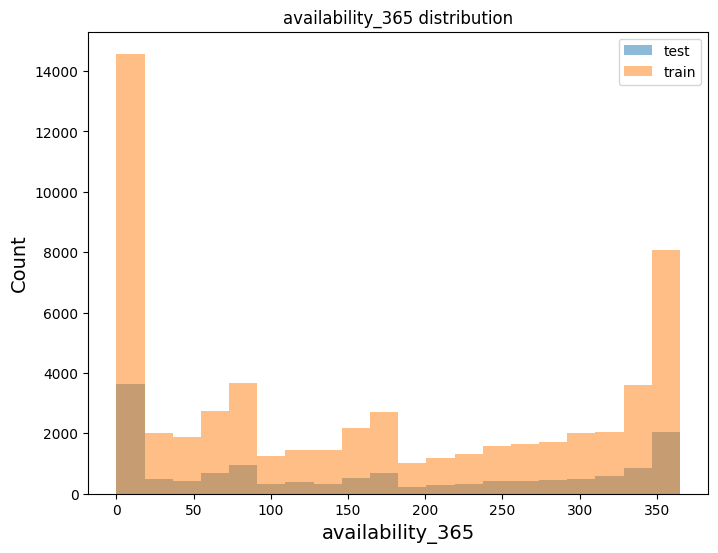

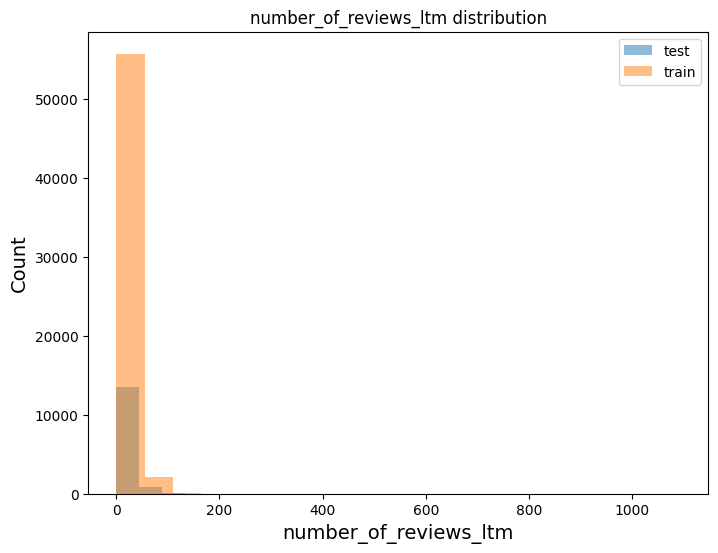

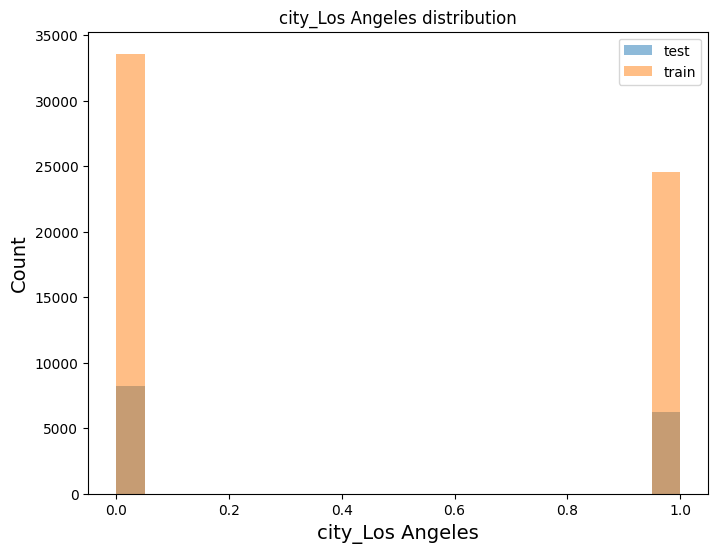

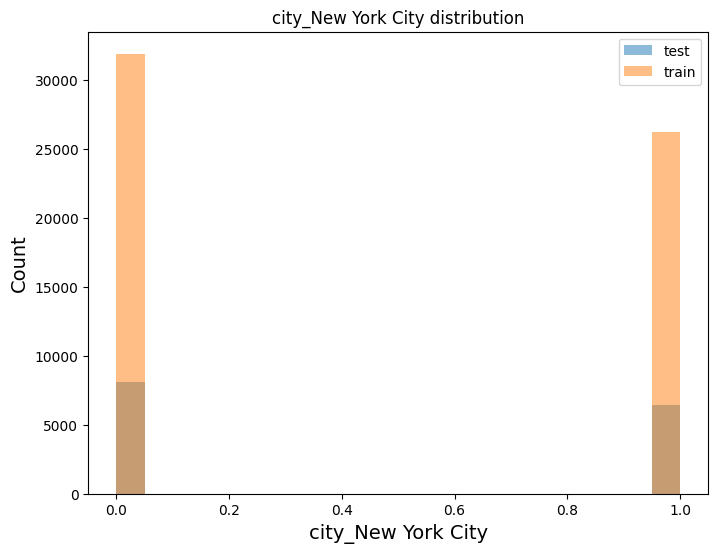

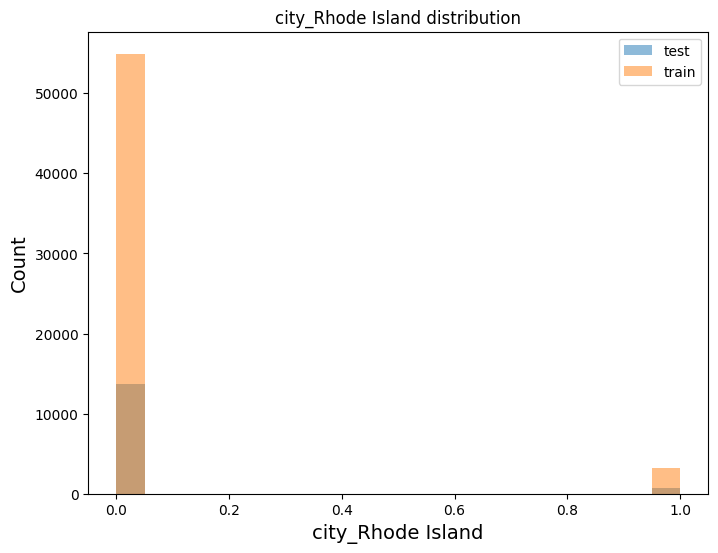

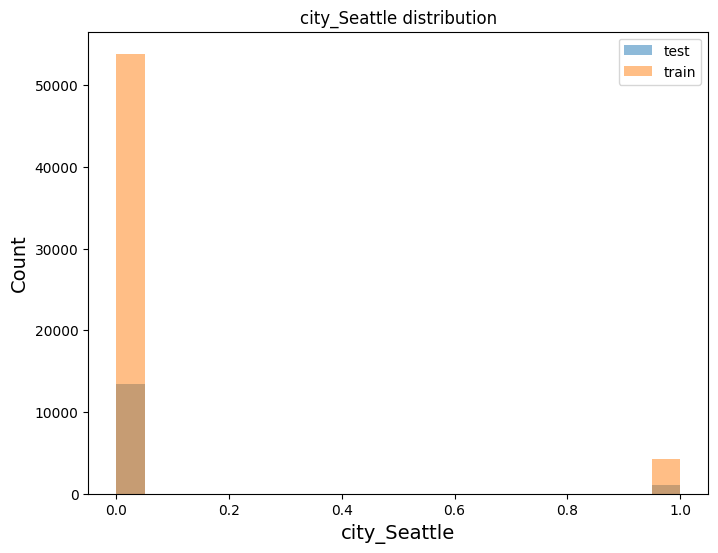

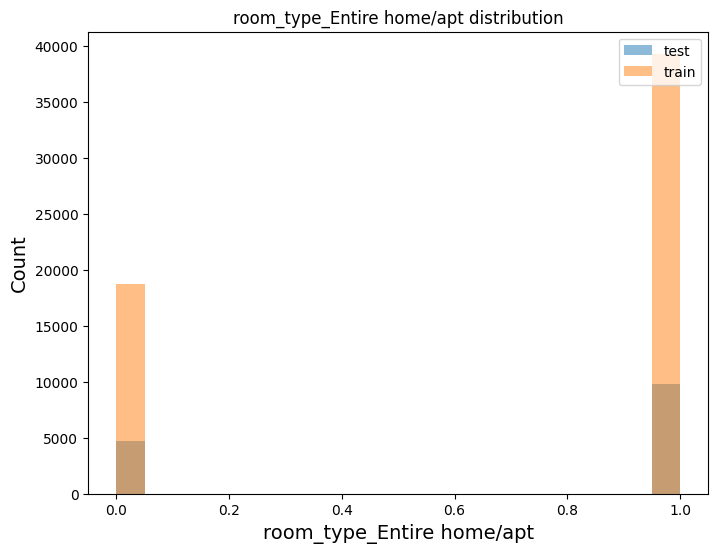

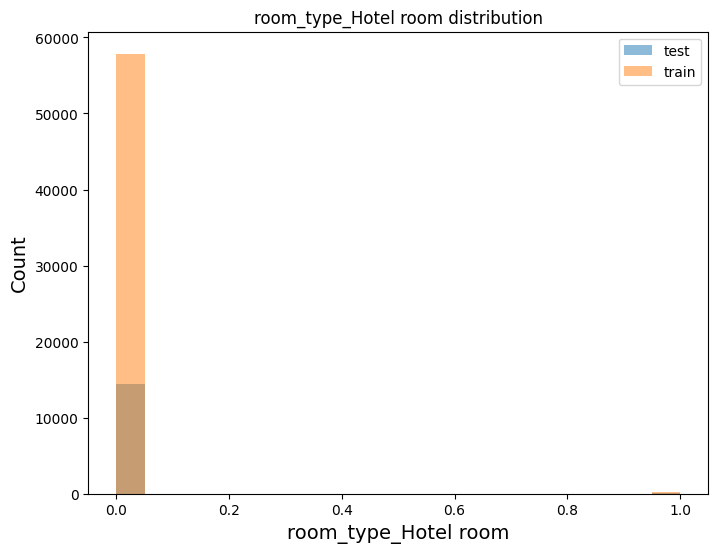

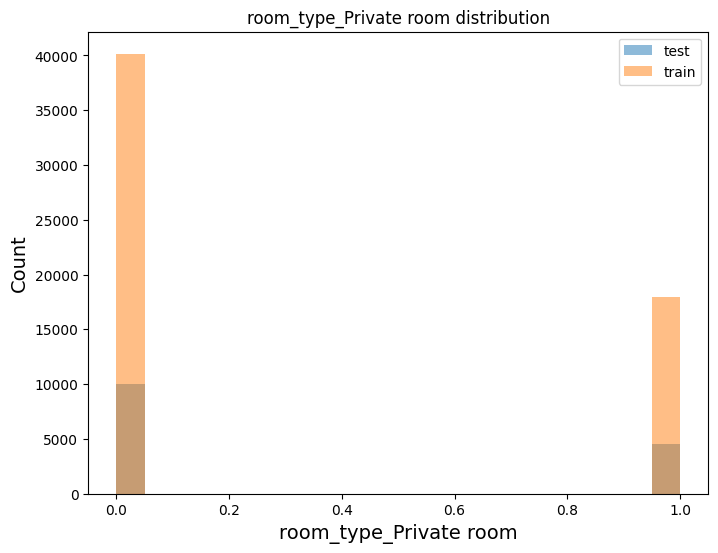

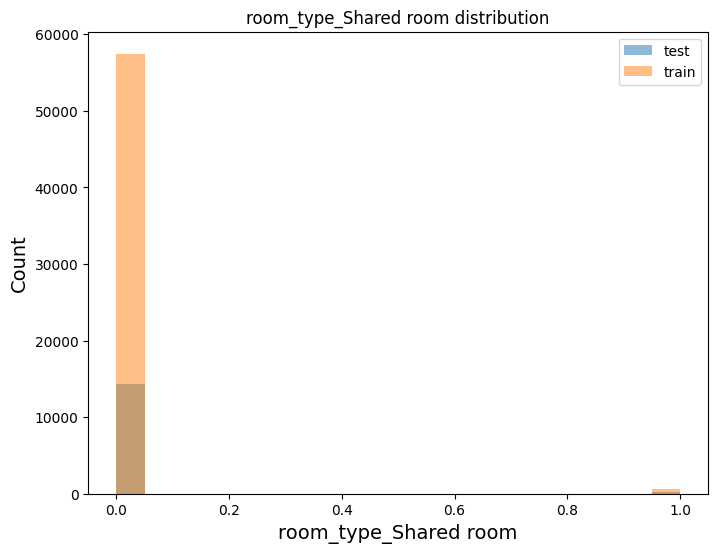

In [53]:
X_test_plot = X_test

X_train_plot = X_t

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

##Do the training and test sets have the same data distribution?

To assess whether the training and test sets have similar data distributions, we examine the overlap and shape of their histograms. If the histograms for each feature closely align in both datasets, this suggests that they have similar distributions. Disparities in these distributions could imply that the model trained on the training set may not perform as expected on the test set.


#Linear Regression

In [55]:
regr = linear_model.LinearRegression()

regr.fit(X_t, y_t)

LinearRegression()

## Predicting without removing outlier

In [65]:
y_pred = regr.predict(X_t)

print("Mean squared error: %.2f" % mean_squared_error(y_t, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_t, y_pred))
r2 = r2_score(y_t, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 930720.59
Coefficient of determination: -0.00
R^2 score on tarining set = -0.004492835352370106


In [57]:
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 730757.66
Coefficient of determination: 0.00
R^2 score on test set = 0.0007617202421716929


In [60]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1

is_outlier = ((encoded_df < (Q1 - 1.5 * IQR)) | (encoded_df > (Q3 + 1.5 * IQR)))

data_filtered = encoded_df[~is_outlier.any(axis=1)]

len(data_filtered)

40957

## Predicting after removing outlier

In [61]:
new_X = data_filtered.drop(columns=['name','host_name','neighbourhood_group','neighbourhood','latitude','longitude','price', 'last_review'])

new_y = data_filtered[["price"]]

new_X_t, new_X_test, new_y_t, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=1)

In [62]:
regr = linear_model.LinearRegression()

regr.fit(new_X_t, new_y_t)

LinearRegression()

In [63]:
new_y_pred = regr.predict(new_X_t)

print("Mean squared error: %.2f" % mean_squared_error(new_y_t, new_y_pred))

print("Coefficient of determination: %.2f" % r2_score(new_y_t, new_y_pred))
r2 = r2_score(new_y_t, new_y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 7238.28
Coefficient of determination: 0.02
R^2 score on tarining set = 0.01910639233249889


In [64]:
new_y_pred = regr.predict(new_X_test)

print("Mean squared error: %.2f" % mean_squared_error(new_y_test, new_y_pred))

print("Coefficient of determination: %.2f" % r2_score(new_y_test, new_y_pred))
r2 = r2_score(new_y_test, new_y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 7071.81
Coefficient of determination: 0.02
R^2 score on test set = 0.02228844508842609


In [75]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

def remove_data_randomly(df, percentage):
    np.random.seed(0)
    df_removed = df.copy()
    for column in df.columns:
        data_to_remove = df[column].sample(frac=percentage)
        df_removed.loc[data_to_remove.index, column] = np.nan
    return df_removed

def impute_data(df_removed):
    imputers = {
        'mean_imputer': SimpleImputer(strategy='mean'),
        'median_imputer': SimpleImputer(strategy='median'),
        'knn_imputer': KNNImputer(n_neighbors=5)
    }

    imputed_dfs = {}
    for name, imputer in imputers.items():
        imputed_dfs[name] = pd.DataFrame(imputer.fit_transform(df_removed), columns=df_removed.columns)

    return imputed_dfs

def evaluate_imputation(original_df, imputed_dfs):
    for name, df_imputed in imputed_dfs.items():
        mse = mean_squared_error(original_df, df_imputed)

        residuals = original_df - df_imputed
        bias = np.mean(residuals)
        variance = np.var(residuals)
        print(f"\n\n{name}\n------------------------------\nMSE: \n{mse}\n------------------------------\nBias: \n{bias}\n------------------------------\nVariance: \n{variance}")

clean_encoded_df = encoded_df[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'city_Los Angeles', 'city_New York City',
       'city_Rhode Island', 'city_Seattle', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

for perc in [0.01, 0.05, 0.10]:
    print(f"\nRemoving {perc*100}% of data:")
    data_removed = remove_data_randomly(clean_encoded_df, perc)
    imputed_dfs = impute_data(data_removed)
    evaluate_imputation(clean_encoded_df, imputed_dfs)



Removing 1.0% of data:


mean_imputer
------------------------------
MSE: 
67.20077490801461
------------------------------
Bias: 
price                             30.925913
minimum_nights                     3.372101
number_of_reviews                  6.144268
reviews_per_month                 -0.007999
calculated_host_listings_count     6.798503
availability_365                  25.695233
number_of_reviews_ltm             -1.005763
city_Los Angeles                   0.733442
city_New York City                -0.530884
city_Rhode Island                 -0.078247
city_Seattle                      -0.123949
room_type_Entire home/apt          0.062006
room_type_Hotel room              -0.001743
room_type_Private room            -0.061907
room_type_Shared room              0.002188
dtype: float64
------------------------------
Variance: 
price                             1.648701e+06
minimum_nights                    1.466264e+03
number_of_reviews                 1.215386e+04
reviews_pe

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

### Data Removal and Imputation Analysis:

The performance of three imputation methods (mean, median, and k-NN) is assessed after removing 1%, 5%, and 10% of the data. Evaluation is based on Mean Squared Error (MSE), bias, and variance.

#### 1% Data Removal:
- **Mean Imputer**:
  - MSE: Lowest, indicating effective imputation.
  - Bias and Variance: Present but relatively low.
- **Median Imputer**:
  - MSE: Slightly higher than mean imputer.
  - Bias and Variance: A bit higher, indicating less accuracy.
- **K-NN Imputer**:
  - MSE: Higher than mean, lower than median.
  - Bias and Variance: Comparable to mean imputer.

#### 5% Data Removal:
- **Mean Imputer**:
  - MSE: Lowest, effective even with more significant data loss.
  - Bias and Variance: Increased but still the lowest.
- **Median Imputer**:
  - MSE: Higher than mean, lower than k-NN.
  - Bias and Variance: Moderate.
- **K-NN Imputer**:
  - MSE: Highest.
  - Bias and Variance: Highest, indicating struggles at this level.

#### 10% Data Removal:
- **Mean Imputer**:
  - MSE: Maintains lowest metrics.
  - Bias and Variance: Increased but still lowest among methods.
- **Median Imputer**:
  - MSE: Higher than mean, lower than k-NN.
  - Bias and Variance: Higher than mean.
- **K-NN Imputer**:
  - MSE: Highest.
  - Bias and Variance: Highest, less robust to larger missing data.

### Interpretation:
- **Mean Imputer**: Consistently most effective across all data removal levels.
- **Median Imputer**: Generally better than k-NN but not as effective as


#References

- Scikit-learn official documentation
- Referred to Towards Data Science
- Kaggle
- Youtube video provided by professor in the assignment for missing values imputation method

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science.
Used dataset from Kaggle- https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data/data

Youtube-  https://www.youtube.com/watch?v=fYhr8eF1ubo

The remaining code was written independently.